Time Series Decomposition


![alt text](image.png)

In [1]:
%pip install pmdarima==2.0.3
     

You should consider upgrading via the 'c:\ML\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
## install below packages as per versions pip install numpy==1.24.4 pip install pmdarima==2.0.3
%pip install numpy==1.24.4

  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\ML\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Data Ingestion

In [4]:

import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/AirPassengers.csv"
df= pd.read_csv(path,index_col="Month",parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.resample("YE").sum()

,Passengers
Month,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


In [6]:
df.resample("YE").mean()

,Passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


In [7]:
df.resample("QE").mean()
     

,Passengers
Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333
1950-06-30,136.333333
1950-09-30,166.000000
1950-12-31,129.000000
1951-03-31,157.666667


Visualize the time Series
Seasonality
Trend
Residual=> Noise=> Random

In [9]:
import matplotlib.pyplot as plt

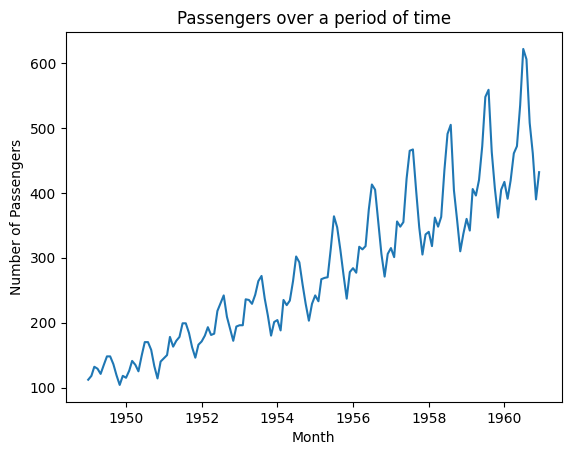

In [10]:
plt.plot(df["Passengers"])
plt.title("Passengers over a period of time")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

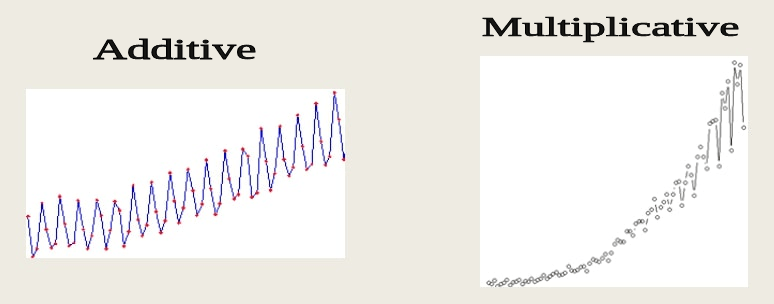

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

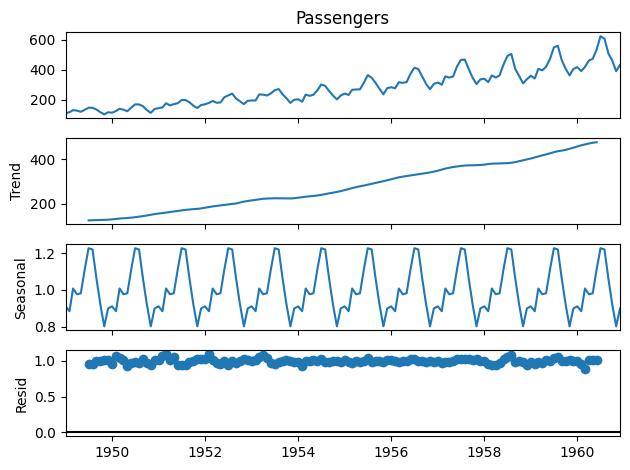

In [12]:
s = seasonal_decompose(df["Passengers"],model="mul")
s.plot()
plt.show()
     

Trend


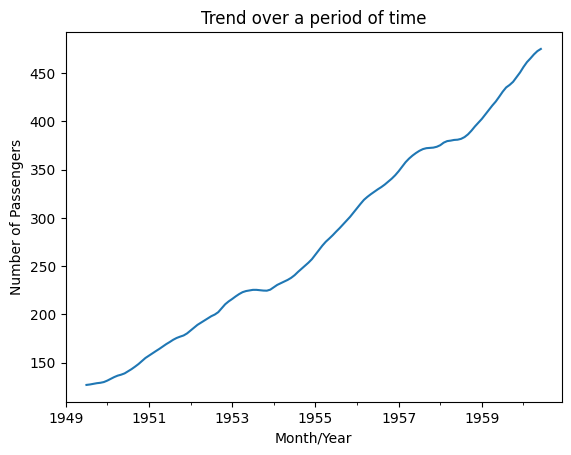

In [13]:
s.trend.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Trend over a period of time")
plt.show()
     

Seasonal

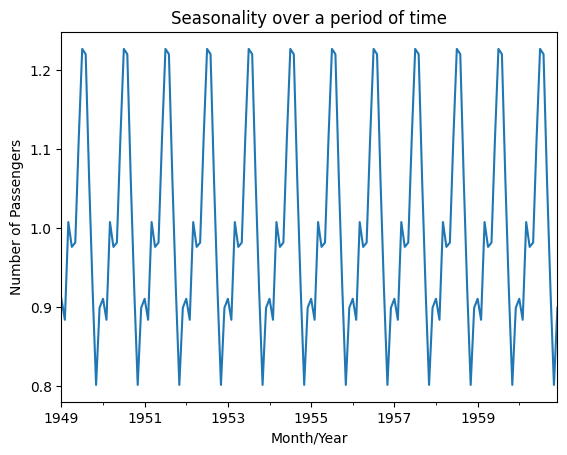

In [14]:
s.seasonal.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Seasonality over a period of time")
plt.show()

Residual

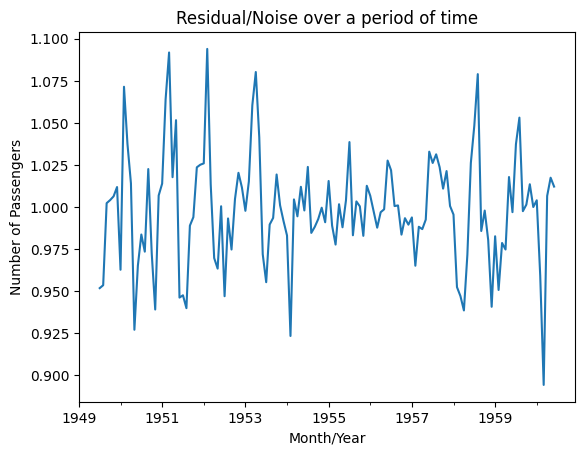

In [15]:
s.resid.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Residual/Noise over a period of time")
plt.show()

Forecasting Model

In [16]:
from pmdarima.arima import auto_arima
     

In [17]:
model = auto_arima(df["Passengers"],seasonal=True,m=12,trace=True)
     

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.98 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.44 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.08 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.16 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.45 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.97 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.95 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.89 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(3,1,1)(0,1,0

Model with p,d,q which gives the lowest AIC score is considered as the best model

In [18]:
model.order
     

(2, 1, 1)

Forecast for next 3 years
months = 3*12 = 36

In [19]:
months = 36
forecast,conf = model.predict(n_periods=36,return_conf_int=True)
     


In [20]:
forecast
     


1961-01-01    445.634980
1961-02-01    420.395086
1961-03-01    449.198426
1961-04-01    491.840063
1961-05-01    503.394595
1961-06-01    566.862566
1961-07-01    654.260285
1961-08-01    638.597588
1961-09-01    540.883832
1961-10-01    494.126700
1961-11-01    423.332777
1961-12-01    465.507633
1962-01-01    479.290979
1962-02-01    454.176974
1962-03-01    483.087131
1962-04-01    525.819403
1962-05-01    537.450839
1962-06-01    600.984063
1962-07-01    688.437150
1962-08-01    672.821432
1962-09-01    575.147538
1962-10-01    528.424229
1962-11-01    457.659005
1962-12-01    499.858213
1963-01-01    513.662221
1963-02-01    488.565748
1963-03-01    517.490781
1963-04-01    560.235675
1963-05-01    571.877821
1963-06-01    635.420132
1963-07-01    722.880929
1963-08-01    707.271755
1963-09-01    609.603412
1963-10-01    562.884814
1963-11-01    492.123586
1963-12-01    534.326185
Freq: MS, dtype: float64

In [21]:
conf

array([[423.34476162, 467.92519882],
       [394.23538334, 446.55478816],
       [419.83175272, 478.56509872],
       [460.37635481, 523.30377026],
       [470.38059526, 536.40859412],
       [532.6995021 , 601.02562943],
       [619.22134626, 689.29922334],
       [602.88007711, 674.31509857],
       [504.631476  , 577.13618704],
       [457.4461267 , 530.80727274],
       [386.30403276, 460.36152065],
       [428.19150691, 502.82375899],
       [433.49768105, 525.08427768],
       [405.10909245, 503.24485552],
       [431.1558949 , 535.01836755],
       [471.84085136, 579.79795423],
       [481.87391852, 593.02775906],
       [544.15696147, 657.81116454],
       [630.60915901, 746.26514001],
       [614.17958065, 731.46328336],
       [515.83282159, 634.46225419],
       [468.54452781, 588.30393075],
       [397.29768773, 518.02032295],
       [439.08035693, 560.63606874],
       [446.3276434 , 580.9967993 ],
       [418.3187783 , 558.81271734],
       [444.62486474, 590.35669703],
 

In [22]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["Forecast Passengers"]
df_forecast.index.name = "Month"
df_forecast
     

,Forecast Passengers
Month,
1961-01-01,445.634980
1961-02-01,420.395086
1961-03-01,449.198426
1961-04-01,491.840063
1961-05-01,503.394595
1961-06-01,566.862566
1961-07-01,654.260285
1961-08-01,638.597588
1961-09-01,540.883832


In [23]:

df_forecast[["Lower Confidence Bound","Upper Confidence Bound"]] = conf
df_forecast
     

,Forecast Passengers,Lower Confidence Bound,Upper Confidence Bound
Month,,,
1961-01-01,445.634980,423.344762,467.925199
1961-02-01,420.395086,394.235383,446.554788
1961-03-01,449.198426,419.831753,478.565099
1961-04-01,491.840063,460.376355,523.303770
1961-05-01,503.394595,470.380595,536.408594
1961-06-01,566.862566,532.699502,601.025629
1961-07-01,654.260285,619.221346,689.299223
1961-08-01,638.597588,602.880077,674.315099
1961-09-01,540.883832,504.631476,577.136187


Visualizt the plot

In [24]:
df_forecast.columns

Index(['Forecast Passengers', 'Lower Confidence Bound',
       'Upper Confidence Bound'],
      dtype='object')

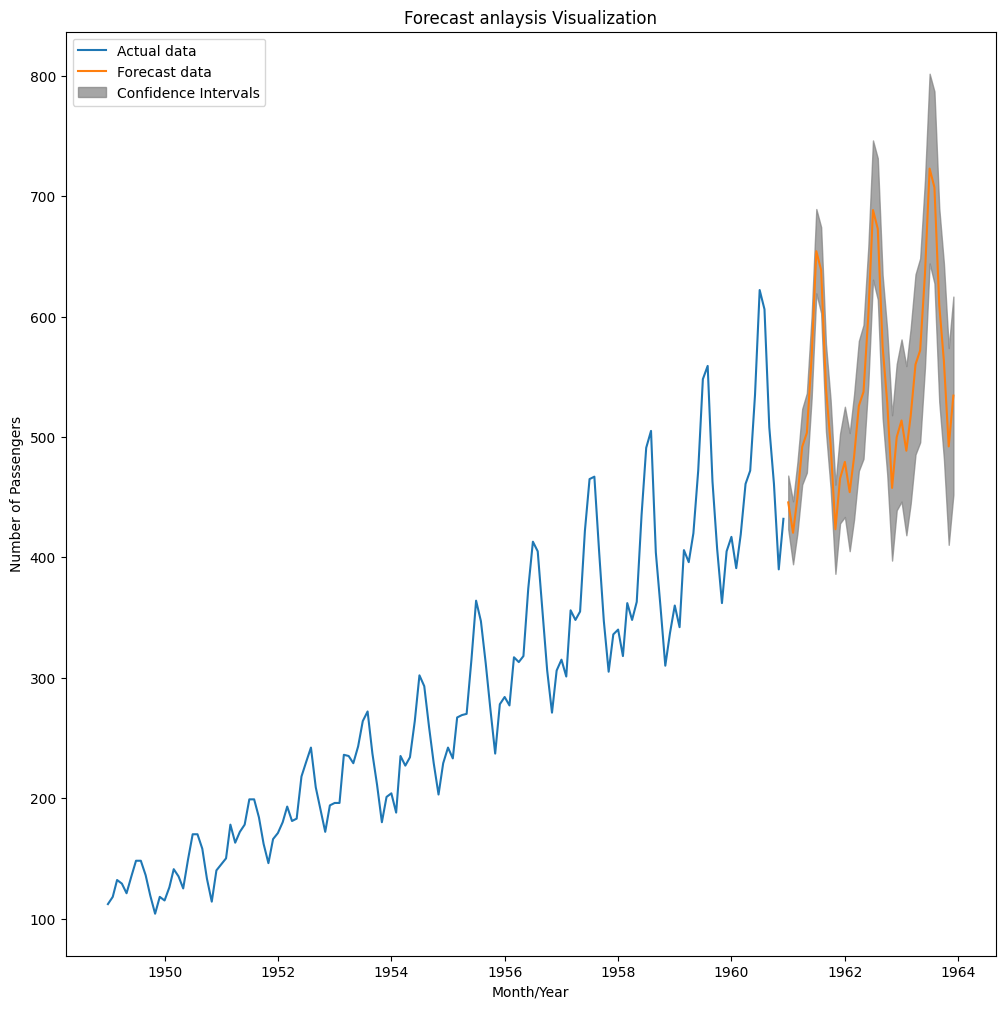

In [25]:
plt.figure(figsize=(12,12))
plt.plot(df["Passengers"],label="Actual data")
plt.plot(df_forecast["Forecast Passengers"],label="Forecast data")
plt.fill_between(df_forecast.index,df_forecast["Lower Confidence Bound"],df_forecast["Upper Confidence Bound"],color="gray",
                 alpha=0.7,label="Confidence Intervals")
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Forecast anlaysis Visualization")
plt.legend()
plt.show()
     

In [26]:
df_forecast.to_csv("Forecasted Results.csv")
     